In this project, I will be using 4 **LSTM** layers with **Bidirectional** layers, 4 dropout layers, a **Fully Connected** layer and a **dense** layer in the end to predict the high price.

LSTM layers will have 64 units each and dropout layer will have drop probability of 0.1

In [1]:
# importing all the required modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

import math
from sklearn.metrics import mean_squared_error

In [2]:
# uploading the dataset, I won't be using the date column as index for the simplicity
dataset = pd.read_csv("GOOG.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4912 non-null   object 
 1   Open       4912 non-null   float64
 2   High       4912 non-null   float64
 3   Low        4912 non-null   float64
 4   Close      4912 non-null   float64
 5   Adj Close  4912 non-null   float64
 6   Volume     4912 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 268.8+ KB


In [3]:
# checking the shape of the dataset
dataset.shape

(4912, 7)

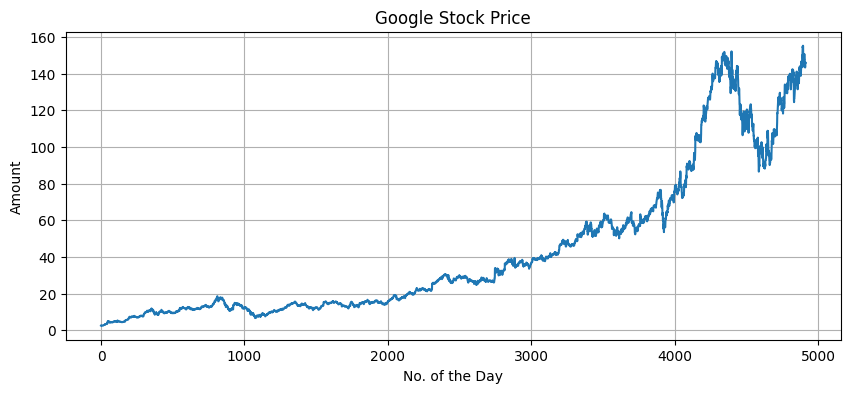

In [4]:
# plotting the "High" value from the whole dataset
dataset["High"].plot(figsize = (10, 4))
plt.xlabel("No. of the Day")
plt.ylabel("Amount")
plt.title("Google Stock Price")
plt.grid(True)
plt.show()

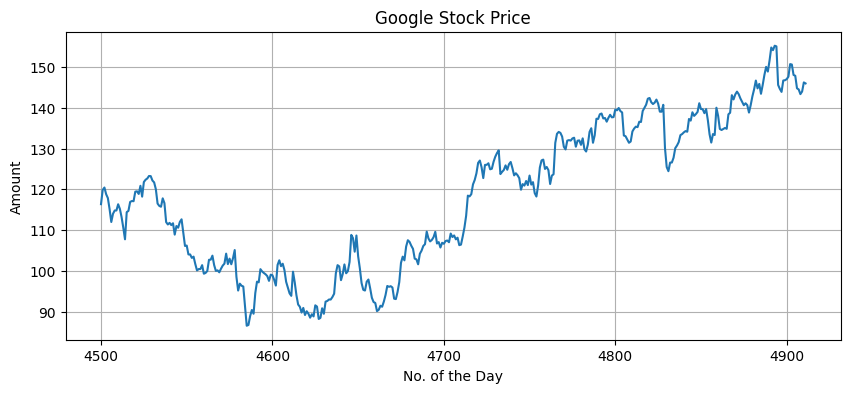

In [5]:
# plotting this graph to decide from where to split the dataset into train and test
dataset["High"][4500 : ].plot(figsize = (10, 4))
plt.xlabel("No. of the Day")
plt.ylabel("Amount")
plt.title("Google Stock Price")
plt.grid(True)
plt.show()

In [6]:
# splitting the whole dataset into train and test dataset
train_data = dataset[ : 4600].iloc[:, 2:3].values
test_data = dataset[4600 : ].iloc[:, 2:3].values

In [7]:
# checking the shape of the train and test dataset
print(f"Shape of training data : {train_data.shape}")
print(f"Shape of the test dataset : {test_data.shape}")

Shape of training data : (4600, 1)
Shape of the test dataset : (312, 1)


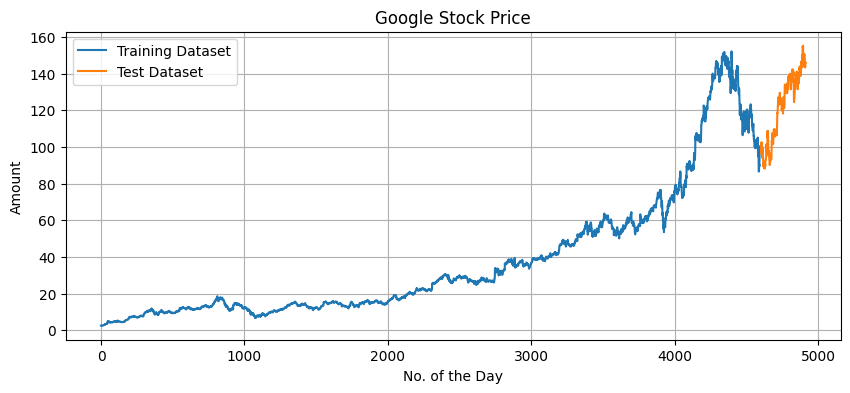

In [8]:
# plotting the whole dataset with train and test data in diiferent colours
plt.figure(figsize = (10, 4))
plt.plot(dataset["High"][: 4600])
plt.plot(dataset["High"][4600 :])
plt.legend(["Training Dataset", "Test Dataset"])
plt.xlabel("No. of the Day")
plt.ylabel("Amount")
plt.title("Google Stock Price")
plt.grid(True)
plt.show()

In [9]:
# using MinMaxScaler to scale the input values between 0 and 1
sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(train_data)

x_train = []
y_train = []

# making the windows of length 60
for i in range(60, train_data.shape[0]):
  x_train.append(training_set_scaled[i-60: i, 0])
  y_train.append(training_set_scaled[i, 0])

# changing the list to a nparray for easy training of the model.
x_train, y_train = np.array(x_train, dtype = "float"), np.array(y_train, dtype = "float")

In [10]:
# checking the shape of both x_train and y_train.
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of y_train : {y_train.shape}")

Shape of x_train : (4540, 60)
Shape of y_train : (4540,)


In [11]:
# reshaping the train dataset into 3 dimension, as the LSTM model accepts 3 dimensional values only
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(f"Shape of x_train : {x_train.shape}")

Shape of x_train : (4540, 60, 1)


In [12]:
# making the model using TensorFlow Functional API
class MyModel(tf.keras.Model):

  def __init__(self, lstm_units = None, dropout_value = None):
    super().__init__()

    # keeping the return_sequence = True, with this each LSTM unit will return the values instead of last unit only.
    # LSTM layer 1
    self.lstm_1 = Bidirectional(LSTM(units = lstm_units, return_sequences = True))
    self.dropout_1 = Dropout(dropout_value)

    # LSTM layer 2
    self.lstm_2 = Bidirectional(LSTM(units = lstm_units, return_sequences = True))
    self.dropout_2 = Dropout(dropout_value)

    # LSTM layer 3
    self.lstm_3 = Bidirectional(LSTM(units = lstm_units, return_sequences = True))
    self.dropout_3 = Dropout(dropout_value)

    # LSTM layer 4
    self.lstm_4 = Bidirectional(LSTM(units = lstm_units))
    self.dropout_4 = Dropout(dropout_value)

    # Fully connected layer
    self.dense_1 = Dense(units = 15)

    # output layer
    self.output_1 = Dense(1)

  def call(self, inputs):

    x = self.lstm_1(inputs)
    x = self.dropout_1(x)

    x = self.lstm_2(x)
    x = self.dropout_2(x)

    x = self.lstm_3(x)
    x = self.dropout_3(x)

    x = self.lstm_4(x)
    x = self.dropout_4(x)

    x = self.dense_1(x)

    x = self.output_1(x)

    return x

In [13]:
# defining the model
model = MyModel(lstm_units = 64, dropout_value = 0.2)

In [14]:
# using Adam optimizer with learning rate set to 0.001, beta_1 = 0.9, 0.998 and epsilon as 1e-7
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,
                                                   beta_1 = 0.9,
                                                   beta_2 = 0.998,
                                                   epsilon = 1e-7),
              loss = tf.keras.losses.MeanSquaredError())

In [15]:
# training the model and setitng the epochs to 25
model.fit(x_train,
          y_train,
          epochs = 25)

Epoch 1/25
142/142 [==============================] - 24s 30ms/step - loss: 0.0028
Epoch 2/25
142/142 [==============================] - 4s 26ms/step - loss: 0.0011
Epoch 3/25
142/142 [==============================] - 3s 24ms/step - loss: 7.7644e-04
Epoch 4/25
142/142 [==============================] - 4s 26ms/step - loss: 8.1173e-04
Epoch 5/25
142/142 [==============================] - 4s 29ms/step - loss: 7.8565e-04
Epoch 6/25
142/142 [==============================] - 3s 24ms/step - loss: 6.5700e-04
Epoch 7/25
142/142 [==============================] - 4s 25ms/step - loss: 6.6717e-04
Epoch 8/25
142/142 [==============================] - 4s 30ms/step - loss: 6.0379e-04
Epoch 9/25
142/142 [==============================] - 4s 25ms/step - loss: 6.4765e-04
Epoch 10/25
142/142 [==============================] - 4s 26ms/step - loss: 5.4188e-04
Epoch 11/25
142/142 [==============================] - 4s 30ms/step - loss: 5.4943e-04
Epoch 12/25
142/142 [==============================] - 4s 2

In [16]:
# information about different layers of the model
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  multiple                  33792     
 al)                                                             
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 bidirectional_1 (Bidirecti  multiple                  98816     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 bidirectional_2 (Bidirecti  multiple                  98816     
 onal)                                                           
                                                          

In [17]:
# scaling the values of test dataset between 0 and 1
testing_set_scaled = sc.fit_transform(test_data)

x_test = []
y_test = []

for i in range(60, test_data.shape[0]):
  x_test.append(testing_set_scaled[i-60: i, 0])
  y_test.append(testing_set_scaled[i, 0])

x_test, y_test = np.array(x_test, dtype = "float"), np.array(y_test, dtype = "float")

In [18]:
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of x_test : (252, 60)
Shape of y_test : (252,)


In [19]:
# reshaping x_test into a 3 dimension array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(f"Shape of x_test : {x_test.shape}")

Shape of x_test : (252, 60, 1)


In [20]:
# predicting the values of x_test using the model
prediction = model.predict(x_test)

8/8 [==============================] - 3s 15ms/step


In [21]:
# as we have used 60 as a window which will make the shape of prediction less compared to the original shape in the test_dataset
test_data_plot = test_data = dataset[4660 : ].iloc[:, 2:3].values

In [22]:
# checking the shape to make sure test_data and prediction is of same shape
print(f"Shape of test_data for plotting : {test_data_plot.shape}")
print(f"Shape of the prediction data : {prediction.shape}")

Shape of test_data for plotting : (252, 1)
Shape of the prediction data : (252, 1)


In [23]:
# reversing the scaling that is done on the data
prediction = sc.inverse_transform(prediction)

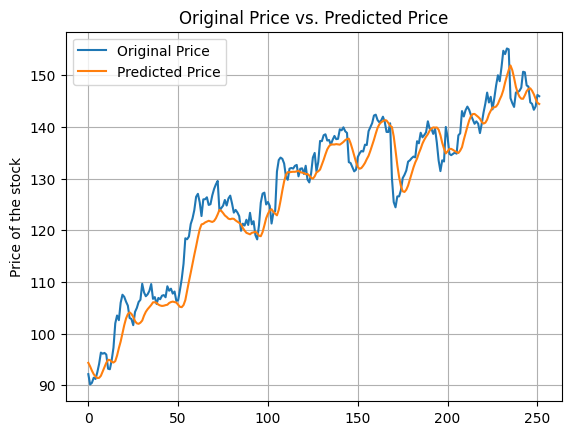

In [24]:
# plotting a graph of original data compared to predicted data
plt.plot(test_data_plot, label = "Original Price")
plt.plot(prediction, label = "Predicted Price")
plt.title("Original Price vs. Predicted Price")
plt.ylabel("Price of the stock")
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# saving the model in a pickle file
import pickle

model_pkl_file = "Google_model.pkl"
with open(model_pkl_file, "wb") as file:
  pickle.dump(model, file)